# ***Using Machine Learning to Predict Fibonacci's Sequence***

Devoloped by Morgan State University Team 1:

- Takiya Eastmond: Junior Electrical and Computer Engineering
- Deandre Charity: Junior Computer Science
- Donald Davis: Junior Computer Science
- Xavier Johnson: Sophmore Civil Engineering

# Description

##Project Goal

The project goal is to use Fibonacci’s sequence in a recurrent neural network to find the approximation of the following numbers in the sequence. We are using the Fibonacci sequence in a recurrent neural network to find the most accurate representation of the data. The sequence is used as a mathematical metaphor to see the bias and fairness that is used in today’s times as well as how it impacts people’s lives. The tools that we use to accomplish this task is the golden rule which is a quadratic formula that we implanted to teach the network a pattern. In which it accomplishes a divider for fairness. We are also using linear regression as a tool that will give us an exact representation of where the data needs to be so we know where our recurrent neural network needs to be.

# Libraries

Here is a list of the necessary libraries for this project.

In [1]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, SimpleRNN
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn import tree

# Data Preparation


## Create Fibonnacci sequence


We take in the first 10 fibbnacci Numbers by use of reccursion; the function calls itself.

In [2]:
fb_n = 10
n =10
fb = [0,1]
for i in range(fb_n):
  fb.append(fb[-1] + fb[-2])
print('Fibonnaci Seq:'+str(fb))

Fibonnaci Seq:[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


This produces the first 10 numbers of the fibonnaci sequence. We can now move on to the next step of our code.

## Setting Up Feature and Target Arrays


We use two arrays to set up our matrics. Our X array is used to set up our input data. Our Y array is used to output our data. 

In [3]:
X=[]
Y=[]

for i in range(0,n-1):
  X.append([fb[i], fb[i+1]])
  Y.append(sum(X[-1]))

X = np.array(np.reshape(X,(len(X),2,1)))
Y = np.array(Y)

## View the New Appended Data


We print our 'X' and 'Y' to view the outputs.

In [4]:
print("X:")
print(X)
print("Y:")
print(Y)

X:
[[[ 0]
  [ 1]]

 [[ 1]
  [ 1]]

 [[ 1]
  [ 2]]

 [[ 2]
  [ 3]]

 [[ 3]
  [ 5]]

 [[ 5]
  [ 8]]

 [[ 8]
  [13]]

 [[13]
  [21]]

 [[21]
  [34]]]
Y:
[ 1  2  3  5  8 13 21 34 55]


# Build the Model

## Long Short Term Memory (LSTM) Model


We used a long short term memory (lstm) model with one hidden layer. We use our mean square error to measure our loss. 

In [5]:
model = Sequential()

In [6]:
model.add(LSTM(20, activation='relu', input_shape=(2, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

We have succeffully built a model with one layer. Time for the next step.

## Setting Up Stopping Conditions


Here we are preventing overfitting with early stopping.

In [7]:
#Setting up early stopping conditions
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

## Fitting the Model


Once an early stop is in place, we train the model.

In [8]:
	# fitting the model
history = model.fit(X, Y, validation_data=(X, Y), epochs=300, verbose=0)

We have successfully fitted the data to the model. It is now time to reshape the matrix.

## Reshaping the Matrix


Once we have succefully created a matrix, we need to reshape it to house our final sequence for testing to see what the model will predict.

In [9]:
# reshaping
pY = []
pY.append(round(model.predict(np.reshape(np.array([55, 89]),(1, 2, 1)))[0][0]))
pY.append(round(model.predict(np.reshape(np.array([89, 144]),(1, 2, 1)))[0][0]))
pY.append(round(model.predict(np.reshape(np.array([144, 233]),(1, 2, 1)))[0][0]))
pY.append(round(model.predict(np.reshape(np.array([233,377]),(1, 2, 1)))[0][0]))
pY.append(round(model.predict(np.reshape(np.array([377, 610]),(1, 2, 1)))[0][0]))

## Brief View of Our Predicted

We now call the print function on our matrix to view the predicted sequence.

In [10]:
# predicted
print(pY)

[142, 231, 375, 612, 997]


We now have our predicted Fibonacci sequence. Next, the data is compiled.

## Compiling the Data


It is time to test the model. Using .compile will help us achieve this.

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model 1

Our first model utilizes normal regression that results in low accuracy of a linear model.

Train: 0.111, Test: 0.111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


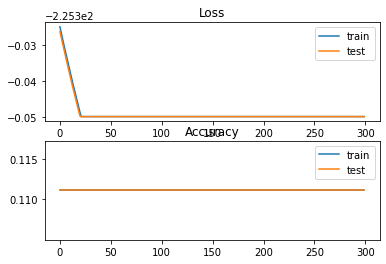

In [12]:
# fit model
history = model.fit(X,Y, validation_data=(X, Y), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X, Y, verbose=0)
_, test_acc = model.evaluate(X, Y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Model 2

For the second model we decided to use Stochastic Gradient Descent as a fit for our regression model.

Train: 0.720, Test: 0.710


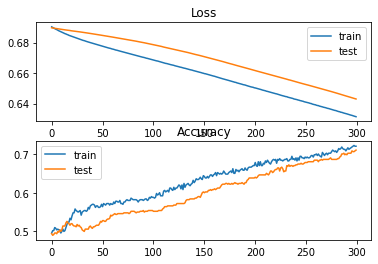

In [13]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
# define model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


# Model 3

For our final model, an Adam Optimzer is implemented to be used as a way to cut down on our loss.

Train: 0.834, Test: 0.848


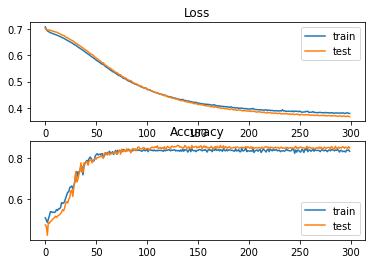

In [14]:
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
# define model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()